In [24]:
import pandas as pd
from numpy import random
import matplotlib.pyplot as plotting
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
df = pd.read_csv("auto-mpg.data",header=None, delim_whitespace=True)
df = df.rename(columns={0: 'mpg', 1: 'cylinders', 2: 'displacement', 3: 'horsepower',
                        4: 'weight', 5: 'acceleration', 6: 'modelyear', 7: 'origin',
                        8: 'carname'})

<font color=green><h2>Question-1:</h2></font>
<h3>How many cars and how many attributes are in the dataset?<h3>

In [25]:
print("\nNumber of unique cars in the dataset = ",len(df['carname'].unique()))
print("Total number of attributes in the dataset = ",len(df.columns))


Number of unique cars in the dataset =  305
Total number of attributes in the dataset =  9


<font color=green><h2>Question-2:</h2></font>
<h3>How many distinct car companies are represented in the data set? What is the name of the car with the best MPG? What car company produced the most 8-cylinder cars? What are the names of 3-cylinder cars? Do some internet search that can tell you about the history and popularity of those 3-cylinder cars.</h3>
<br><br>

In [26]:
cars=df['carname']
mpg=df['mpg']
distinct_car_companies=[]
for i in cars:
    i=i.split(" ")
    if i[0] not in distinct_car_companies:
        distinct_car_companies.append(i[0])
        
print("\nNumber of distinct car companies =",len(distinct_car_companies))
print("The car with the best mpg is",df.loc[df['mpg'] == mpg.max(), 'carname'].iloc[0],
      "and its mpg is",mpg.max())

eight_cylinders_cars=df.loc[df['cylinders'] == 8, 'carname']
eight_cylinders_car_companies=[]
for i in eight_cylinders_cars:
    i=i.split(" ")
    eight_cylinders_car_companies.append(i[0])

counter = 0
frequent_car_company = eight_cylinders_car_companies[0]   
for i in eight_cylinders_car_companies: 
    curr_frequency = eight_cylinders_car_companies.count(i) 
    if(curr_frequency> counter): 
       counter = curr_frequency 
       frequent_car_company = i

print("The car company which produced most 8-cylinder cars is",
      frequent_car_company)
three_cylinders=df.loc[df['cylinders'] == 3, 'carname'].tolist()
print("The names of cars with three cylinders are",', '.join(three_cylinders))


Number of distinct car companies = 37
The car with the best mpg is mazda glc and its mpg is 46.6
The car company which produced most 8-cylinder cars is ford
The names of cars with three cylinders are mazda rx2 coupe, maxda rx3, mazda rx-4, mazda rx-7 gs


<font color=green><h3>History and Popularity of 3-cylinder cars</h3></font>
<p>Three-cylinder engines were popular with Japanese automakers back in the 1980s and 1990s, as a way of reducing weight and fuel consumption in smaller vehicles. Now, they're making a resurgence, as low weight and improved efficiency are once again at the forefront of automakers' development tasks. Three-cylinder engines are all the rage right now. Once the preserve of basic economy cars, they're now used in everything from the latest generation of economy vehicles, through sporty hatchbacks like the 2015 MINI Cooper and Ford Fiesta 1.0 EcoBoost, to BMW's i8 plug-in hybrid sports car.</p>
<br><br>
<font color=green><h2>Question-3:</h2></font>
<h3>What is the range, mean, and standard deviation of each attribute? Pay attention to potential missing values.</h3>
<br>

In [27]:
df['horsepower'] = df['horsepower'].apply(lambda x: float(x.replace('?','NaN')))
print(df.describe(percentiles=[0.5])[1:])

            mpg  cylinders  displacement  horsepower       weight  \
mean  23.514573   5.454774    193.425879  104.469388  2970.424623   
std    7.815984   1.701004    104.269838   38.491160   846.841774   
min    9.000000   3.000000     68.000000   46.000000  1613.000000   
50%   23.000000   4.000000    148.500000   93.500000  2803.500000   
max   46.600000   8.000000    455.000000  230.000000  5140.000000   

      acceleration  modelyear    origin  
mean     15.568090  76.010050  1.572864  
std       2.757689   3.697627  0.802055  
min       8.000000  70.000000  1.000000  
50%      15.500000  76.000000  1.000000  
max      24.800000  82.000000  3.000000  


<font color=green><h2>Question-4:</h2></font>
<h3> Plot histograms for each attribute. Pay attention to the appropriate choice of number of bins. Write 2-3 sentences summarizing some interesting aspects of the data by looking at the histograms.</h3>
<br>

The histograms of the attributes are given below:


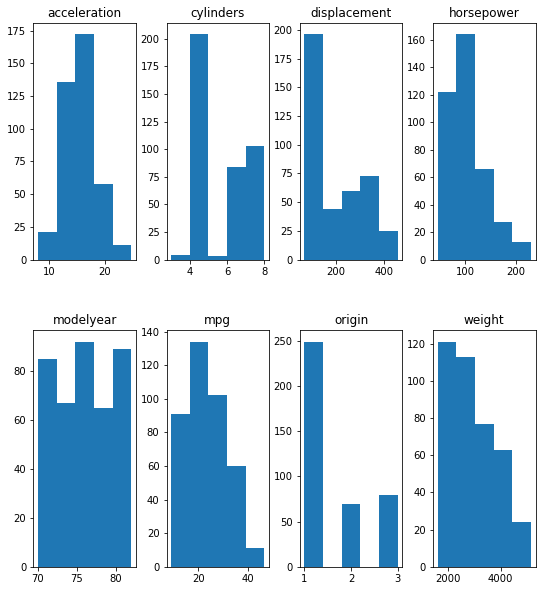

In [28]:
print("The histograms of the attributes are given below:")
df.hist(bins=5,grid=False,layout=[2,4],figsize=[9,10])
plotting.show()

<p>From the histogram, we can conclude that as weight, horsepower and mpg increases, the number of cars produced decreases significantly. It can also be concluded that the car production increases and decreases in the successive consecutive years.</p>
<br>
<font color=green><h2>Question-5:</h2></font>
<h3>Plot a scatterplot of weight vs. MPG attributes. What do you conclude about the relationship between the attributes? What is the correlation coefficient between the 2 attributes?</h3>
<br>

The scatterplot of weight vs mpg is given below:


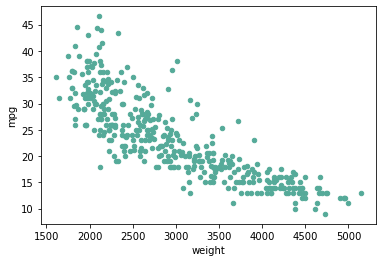


The correlation coefficient between weight and mpg is -0.8317409332443351


In [29]:
print("The scatterplot of weight vs mpg is given below:")
df.plot.scatter(x='weight', y='mpg', c='#5A9')
plotting.show()
print("\nThe correlation coefficient between weight and mpg is",
      df['weight'].corr(df['mpg']))

<p> From the correlation coefficient and the scatter plot, it can be said that weight and mpg are negatively correlated meaning that as weight increases, mpg decreases and vice versa. </p>
<br>
<font color=green><h2>Question-6:</h2></font>
<h3>Plot a scatterplot of year vs. cylinders attributes. Add a small random noise to the values to make the scatterplot look nicer. What can you conclude? Do  some internet  search about the history of car industry during 70’s that might explain the results.</h3>
<br>


BEFORE ADDING RANDOM NOISE
The scatterplot of model year vs cylinders is given below:


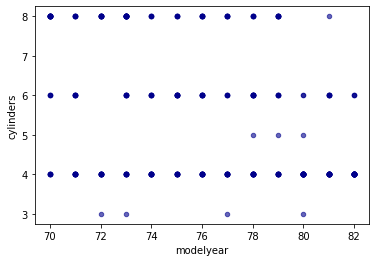


AFTER ADDING RANDOM NOISE
The scatterplot of model year vs cylinders is given below:


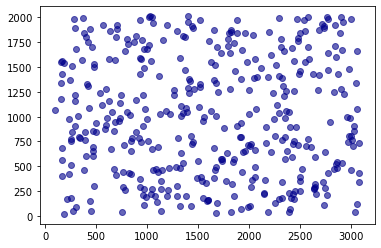

In [30]:
print("\nBEFORE ADDING RANDOM NOISE")
print("The scatterplot of model year vs cylinders is given below:")
df.plot.scatter(x='modelyear', y='cylinders', c='DarkBlue',alpha=0.6)
plotting.show()

cylinders=list(df['cylinders'])
modelyear=list(df['modelyear'])

for i in range(len(cylinders)):
    cylinders[i]+=random.randint(0,1000)*2+10
    modelyear[i]+=random.randint(0,1000)*3+15
    
    
print("\nAFTER ADDING RANDOM NOISE")
print("The scatterplot of model year vs cylinders is given below:")
plotting.scatter(modelyear,cylinders, c='DarkBlue',alpha=0.6)
plotting.show()

<p> During the 1970s, all the major automobile companies produced even numbered cylinder cars which might explain why the scatter plot looked like that shown above. By the end of 70s decade, most of the companies stopped produced higher cylinder cars which might explain the deduction of plots in 8-cylinders shown above.</p>

<font color=green><h2>Question-7:</h2></font>
<h3>Show 2 more scatterplots that are interesting do you. Discuss what you see.</h3>
<br>

The scatterplot of horsepower vs acceleration is given below:


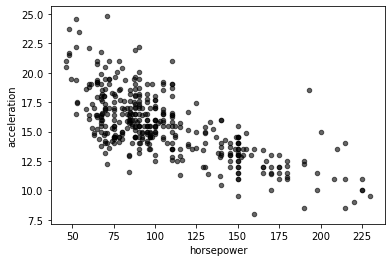

The scatterplot of displacement vs weight is given below:


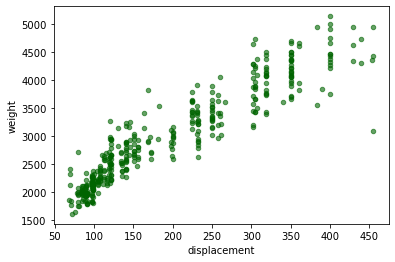

In [31]:
print("The scatterplot of horsepower vs acceleration is given below:")
df.plot.scatter(x='horsepower', y='acceleration', c='black',alpha=0.6)
plotting.show()

print("The scatterplot of displacement vs weight is given below:")
df.plot.scatter(x='displacement', y='weight', c='DarkGreen',alpha=0.6)
plotting.show()

<p> From the two scatterplots shown above, two references can be made</p><br>
1. Smaller the horsepower, higher the acceleration and vice versa.<br>
2. Smaller the weight, smaller the displacement and vice versa.
<br><br>
<font color=green><h2>Question-8:</h2></font>
<h3>Plot a time series for all the companies that show how many new cars they introduces during each year. Do you see some interesting trends?</h3>
<br>

The time series plot between years and number of cars produced is shown below:


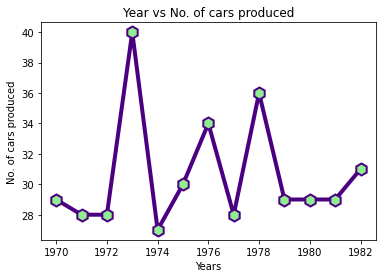

In [32]:
dictValues = {}
for i in df['modelyear']:
    if i not in dictValues.keys():
        newCars = df.loc[df['modelyear'] == i, 'carname']
        i+=1900
        dictValues[i]=newCars.shape[0]

x=list(dictValues.keys())
y=list(dictValues.values())

print("The time series plot between years and number of cars produced is shown below:")
plotting.plot(x, y, color='#4b0082', linewidth=4, marker='h', markerfacecolor='lightgreen',
              markeredgewidth=2, markersize=12)
plotting.xlabel('Years')  
plotting.ylabel('No. of cars produced')  
plotting.title('Year vs No. of cars produced') 
plotting.show() 

<p>From the time series graph of year and no. of cars produced, the car production varies each year drastically. It almost fluctuates like a sine-cose wave.</p>
<font color=green><h2>Question-9:</h2></font>
<h3>Calculate the pairwise correlation, and draw the heatmap with Matplotlib. Do you see some interesting correlation?</h3>

The correlation heatmap is shown below:


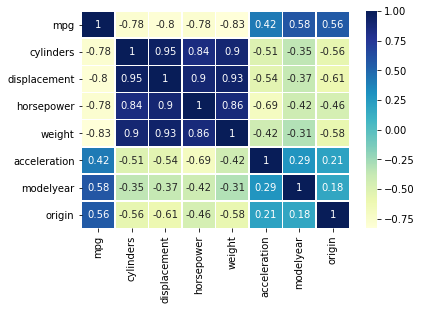

In [33]:
print("The correlation heatmap is shown below:")
correlation = df.corr()
heatmap = sns.heatmap(correlation, cbar=True, annot=True, cmap="YlGnBu", linewidths=.5)